<a href="https://colab.research.google.com/github/ibadurrehman1/Apple-Stock-Price-Prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [20]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-05 00:00:00+00:00,172.80,174.23,172.080,172.58,26933197,41.127712,41.468063,40.956347,41.075350,107732788,0.0,1.0
1,AAPL,2018-04-06 00:00:00+00:00,168.38,172.48,168.200,170.97,35005290,40.075718,41.051550,40.032877,40.692158,140021160,0.0,1.0
2,AAPL,2018-04-09 00:00:00+00:00,170.05,173.09,169.850,169.88,29017718,40.473191,41.196734,40.425590,40.432730,116070872,0.0,1.0
3,AAPL,2018-04-10 00:00:00+00:00,173.25,174.00,171.530,173.00,28614241,41.234815,41.413321,40.825442,41.175314,114456964,0.0,1.0
4,AAPL,2018-04-11 00:00:00+00:00,172.44,173.92,171.700,172.23,22431640,41.042029,41.394281,40.865904,40.992048,89726560,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2023-03-28 00:00:00+00:00,157.65,158.49,155.980,157.97,45992152,157.650000,158.490000,155.980000,157.970000,45992152,0.0,1.0
1254,AAPL,2023-03-29 00:00:00+00:00,160.77,161.05,159.350,159.37,51305691,160.770000,161.050000,159.350000,159.370000,51305691,0.0,1.0
1255,AAPL,2023-03-30 00:00:00+00:00,162.36,162.47,161.271,161.53,49501689,162.360000,162.470000,161.271000,161.530000,49501689,0.0,1.0
1256,AAPL,2023-03-31 00:00:00+00:00,164.90,165.00,161.910,162.44,68749792,164.900000,165.000000,161.910000,162.440000,68749792,0.0,1.0


In [3]:
df_close=df.reset_index()['close']

In [4]:
df_close

0       172.80
1       168.38
2       170.05
3       173.25
4       172.44
         ...  
1253    157.65
1254    160.77
1255    162.36
1256    164.90
1257    166.17
Name: close, Length: 1258, dtype: float64

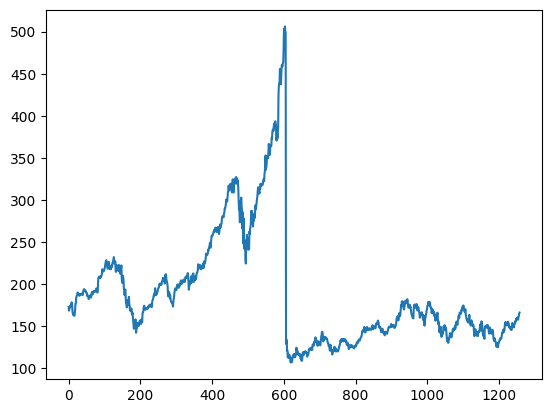

In [5]:
import matplotlib.pyplot as plt
plt.plot(df_close)

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16520977],
       [0.15413901],
       [0.15832185],
       ...,
       [0.13906074],
       [0.14542267],
       [0.14860363]])

In [8]:
length=df_close.shape
length

(1258, 1)

In [9]:
train_data,test_data=df_close[:1000],df_close[1000:]

In [10]:
train_data.shape

(1000, 1)

In [11]:
test_data.shape

(258, 1)

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(dataset.shape[0]-time_step-1):
		a = dataset[i:(i+time_step)] 
		dataX.append(a)
		dataY.append(dataset[i + time_step])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
X_train.shape

(899, 100, 1)

In [15]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64)

Epoch 1/100
15/15 [==============================] - 23s 445ms/step - loss: 0.0333 - val_loss: 4.0506e-04
Epoch 2/100
15/15 [==============================] - 3s 204ms/step - loss: 0.0112 - val_loss: 0.0017
Epoch 3/100
15/15 [==============================] - 5s 350ms/step - loss: 0.0076 - val_loss: 3.6490e-04
Epoch 4/100
15/15 [==============================] - 3s 200ms/step - loss: 0.0072 - val_loss: 6.2276e-04
Epoch 5/100
15/15 [==============================] - 3s 201ms/step - loss: 0.0062 - val_loss: 7.5803e-04
Epoch 6/100
15/15 [==============================] - 3s 202ms/step - loss: 0.0062 - val_loss: 5.0508e-04
Epoch 7/100
15/15 [==============================] - 5s 338ms/step - loss: 0.0051 - val_loss: 7.9039e-04
Epoch 8/100
15/15 [==============================] - 3s 206ms/step - loss: 0.0048 - val_loss: 2.5024e-04
Epoch 9/100
15/15 [==============================] - 3s 203ms/step - loss: 0.0042 - val_loss: 7.6370e-04
Epoch 10/100
15/15 [==============================] - 5s 3

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
### Lets Do the prediction and check performance metrics
print(X_test.shape)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
print(train_predict.shape)
print(test_predict.shape)

In [ ]:
##Transformback to original form
print(test_predict[:5])
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(test_predict[:5])

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:train_predict.shape[0]+look_back] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[train_predict.shape[0]+(look_back*2)+1:df_close.shape[0]-1] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.plot(scaler.inverse_transform(df_close),color='grey',label='Original')
plt.plot(trainPredictPlot,color='red',label='Train_predict')
plt.plot(testPredictPlot,color='g',label='Test_predict')
plt.legend()
plt.show()

In [ ]:
np.savetxt('trainPredictPlot.csv', trainPredictPlot, delimiter=',')
np.savetxt('testPredictPlot.csv', testPredictPlot, delimiter=',')
np.savetxt('data.csv', scaler.inverse_transform(df_close), delimiter=',')


# trainPredictPlot.to_csv('trainPredictPlot')
# testPredictPlot.to_csv('testPredictPlot')
# scaler.inverse_transform(df_close).to_csv('data')

In [ ]:
print(trainPredictPlot.shape)
print(testPredictPlot.shape)
print(scaler.inverse_transform(df_close).shape)

In [ ]:
import numpy as np
a=X_test[0]
a = np.expand_dims(a, axis = 0)
print(a.shape)
result=model.predict(a)
print(result[0][0])
ff=scaler.inverse_transform(result[0].reshape(-1,1))[0][0]
ff

In [ ]:
result=pd.DataFrame(scaler.inverse_transform(df_close),columns=['Original'])
result['predict_train']=trainPredictPlot
result['predict_test']=testPredictPlot
result['date']=df.date
result.to_csv('result.csv')

In [ ]:
df.date

In [ ]:
import numpy as np
a=df_close[-100:]
a = np.expand_dims(a, axis = 0)
print(a.shape)
result=model.predict(a)
print(result[0][0])
ff=scaler.inverse_transform(result[0].reshape(-1,1))[0][0]
ff

In [ ]:
plt.plot(scaler.inverse_transform(df_close))

In [ ]:
plt.plot(trainPredictPlot)

In [ ]:
plt.plot(testPredictPlot)